## Section 1: Create Your Own T-Rex!

Credit: Anna Sommer, Fabienne Kock, Hind Shalfeh, Inga Wohlert, Malte Heyen, Marlon Dammann, Max Wassermann, and Piper Powell


The T-Rex was one of the most famous (and most dangerous) dinosaurs to have existed on Earth. With individuals reaching weights as high as 14 metric tons, these predators were something to watch out for during their prime over 60 million years ago. Now, use Python and the power of Differential Evolution to bring these animals back to life and build the best apex predator you can (but do try to avoid any ... Jurassic Park style incidents while you're at it).

Let the evolution begin!

In [17]:
#Our suggested imports. If you use functions from other packages, be sure to import them here.

import numpy as np
import random as random
import copy 
import statistics
import time
import matplotlib.pyplot as plt

## Task 1 - Create Your T-Rex!

A real T-Rex would have been a complex animal with hundreds of parameters and variations that interacted with its environment and dictated how well it could survive. Here, we'll be starting our evolutionary exercise by creating a simplified version of the predator, with only 7 principle features - brain size, teeth size, height, weight, camouflage level, claw size, and aggression.

Your Differential Evolution expert has reminded you that all calculations for this algorithm occur in a multi-dimensional vector space and that they'll need that taken into account when you create the mathematical representation of your Rex. They've left the specifics of that up to you though. They did recommend starting by defining a unit of measure for your features, and setting a few logical constraints. Thankfully, they've also provided you with some helpful info that might assist you in determining reasonable units and ranges:

- brain size: An adult T-Rex had a brain size of up to approximately 1kg. That's actually only about 1 liter of water!
- teeth size: T-Rex teeth could grow to be up to 30cm long. Dentists beware!
- height: A T-Rex could grow to be taller than 3.5 meters just at the hips. Better raise the ceiling!
- weight: A T-Rex is estimated to have weighed between 5.000 and 7.000 kg. That's nearly three African elephants!
- camouflage level: Camouflage is hard to measure, but you might consider a handy percentage effectiveness measure here.
- claw size: Though not as large as some of their teeth, a T-Rex claw could still grow to around 10cm long. A dangerous weapon!
- aggression: T-Rex was an aggressive animal, but this would have varied by individual. A percentage might be useful here as well.

In [18]:
def create_rex():
    """
    Create a T-Rex with random values for brain size, teeth size, height, weight, camouflage level, claw size, and aggression.
    return: trex; list, a random 7-dimensional vector representing your T-Rex
    """

    brain=random.uniform(0,1000)
    teeth=random.uniform(0,30)
    height=random.uniform(0,3.5)
    weight=random.uniform(5000,7000)
    camouflage_level=random.uniform(0,1)
    claw_size=random.uniform(0,10)
    aggression=random.uniform(0,1)
    
    rex=[brain, teeth, height, weight, camouflage_level, claw_size, aggression]
    
    return rex


## Task 2 - Out of the Lab and Into the Wild
Now that you have created your T-Rex, it's time to let it loose and see how well it survives! After all, we don't want to base our next round of evolutionary exploration on an individual that doesn't survive well in the wild.

To test your T-Rex, create a series of fitness functions that will evaluate its performance in its environment.

Your Differential Evolution expert has explained that for technical reasons, it would be best if all the fitness functions output a score within the same range, perhaps 0-100.

Don't forget how you've stored your T-Rex's trait information...

### 1.1 Fitness to Hunt

Your T-Rex needs to be able to hunt for food. Some of its traits will help it out there, but others could prove a hindrance...

Luckily, there is an abundant amount of large prey that your T-Rex can rip into with their sharp teeth and claws. The prey is quite docile though, and it startles easily. Unless you can hide properly or tactically corner it, it's likely to escape or retaliate aggressively. Your T-Rex also needs to feel like attacking the prey in the first place, and it needs to be fast enough to run and catch it.

Based on this information, identify the features of your T-Rex which will play a role in how well it is able to hunt for food, and then define a function which will output an overall hunting fitness score for your T-Rex based on its levels of these features.

Hint: Brain size and intelligence are of course not directly related, but you might use brain size as a proxy for intelligence here.

In [19]:
def fitness_hunt(trex):
    """
    Evaluates the fitness of a T-Rex with respect to hunting.
    param: trex; list, a vector representing the T-Rex
    return: fithunt; float, hunting fitness value of the T-Rex
    """

    teeth=trex[1]/30
    claw_size=trex[5]/10
    aggression=trex[6]
    
    return (teeth+claw_size+aggression)/3

    #Don't forget to keep your scores in the proper range!

    pass

### 1.2 Fitness to Fight

Your T-Rex will sometimes need to fight other animals, whether over territory or simply to not lose the food it's worked so hard to hunt. Some of its traits will help it out there, but others could prove a hindrance...

Your T-Rex will need good weapons, a willingness to attack, and good planning so it doesn't make a mistake in the battle and get hurt. Even a small T-Rex might be able to prevail with a cunning plan, but if a T-Rex can't maneuver lightly to dodge attacks and land its own blows, it could be a very short conflict.

Based on this information, identify the features of your T-Rex which will play a role in how well it is able to fight when the need arises, and then define a function which will output an overall fighting fitness score for your T-Rex based on its levels of these features.

Hint: Brain size and intelligence are of course not directly related, but you might use brain size as a proxy for intelligence here.

In [20]:
def fitness_fight(trex):
    """
    Evaluates the fitness of a T-Rex with respect to fighting.
    param: trex; list, a vector representing the T-Rex
    return: fitfight; float, fighting fitness value of the T-Rex
    """

    brain = trex[0]/1000
    teeth = trex[1]/30
    claw = trex[5]/10
    aggresion= trex[6]

    return (brain + teeth + claw + aggresion)/4

    #Don't forget to keep your scores in the proper range!

    pass

### 1.3 Fitness to Flee

Even a T-Rex will sometimes need to make a quick getaway if it (ahem) bites off more than it can chew. Some of its traits will help it out there, but others could prove a hindrance...

A lighter T-Rex with longer legs will be able to run away faster. A T-Rex with better camouflaged skin might be able to hide easier. A T-Rex who's too aggressive might not be able to pull itself away from the fight, even if it's poorly matched to its opponent.

Based on this information, identify the features of your T-Rex which will play a role in how well it is able to fight when the need arises, and then define a function which will output an overall fleeing fitness score for your T-Rex based on its levels of these features.

Hint: You might consider a ratio of weight/height to determine running speed.

In [21]:
def fitness_flee(trex):
    """
    Evaluates the fitness of a T-Rex with respect to fleeing.
    param: trex; list, a vector representing the T-Rex
    return: fitflee; float, fleeing fitness value of the T-Rex
    """
    trex_brain_size = trex[0]
    trex_height = trex[2]
    trex_weight = trex[3]
    trex_camouflage_level = trex[4]

    # Relevant features: height, weight, camouflage, brain_size

    flee_value = ((trex_brain_size / 1000) + ( 1 - (trex_height / 3.5)) + ( 1 - (trex_weight / 7000)) + trex_camouflage_level)/4
 
    return flee_value

### Overall Fitness

For technical reasons, your Differential Evolution expert would prefer you assembled your T-Rex's fitness scores into one convenient overall fitness score that they can use in their evaluations. They request that the output of this function be in the same range you used for the basic fitness functions. Higher scores should mean higher chances of survival and a greater level of success in the wild.

In [22]:
def combi_fitness(trex):
    """
    Evaluates the overall fitness of a T-Rex.
    param: trex; list, a vector representing the T-Rex
    return: combifitness; integer, an overall fitness value for your T-Rex
    """
    #Call your other fitness functions above to calculate the overall fitness of your T-Rex
    fight_fitness = fitness_fight(trex)
    flee_fitness = fitness_flee(trex)
    hunt_fitness = fitness_hunt(trex)

    overall_fitness = (fight_fitness + flee_fitness + hunt_fitness) / 3

    return overall_fitness


Your Differential Evolution expert likes your fitness formula! He reminds you though that Differential Evolution usually works by minimizing the fitness function, not maximizing it, meaning that your fitness function will need to behave like a cost function instead. To let you focus on other more important matters, he's provided you with a handy line of code that will perform the necessary conversion to make your function suitable for the standard form of Differential Evolution.

In [23]:
cost_function = lambda x:-combi_fitness(x)

## Task 3: The More, The Merrier

Congratulations! You've created a T-Rex and tested it in the wild. But in order to find the *best* T-Rex, we'll of course need more than one. Create a population of T-Rex's so we can let nature take its course and create the best one.

In [24]:
def create_population(pop_size):
    """
    Creates a population of T-Rex's of size pop_size.
    param: pop_size; integer, the number of T-Rex's you want to create in your population
    return: population; list, a list of the T-Rex vectors that make up your population
    """
    
    trex_population = [create_rex() for i in range(pop_size)]

    return trex_population

## Task 4: Evolution Requires Preparation

Now that we can create a single T-Rex, and a population of T-Rex's, it's time to use our powers of Differential Evolution to build the best Rex possible. We'll need to start by taking care of a few niggling details your Differential Evolution expert has requested you address before the real fun begins.

### Mutation

As you learned in the presentation, mutation is a key step in the Differential Evolution algorithm. Go ahead and program it here so we have it on hand later.


In [25]:
def mutation(current_rex_index, rex_population, differential_weight):
       """
       Creates the mutant vector for the current T-Rex out of the current population.
       param: current_rex_index; integer, the index of the vector for the current T-Rex within the population
              rex_population; list, the list of T-Rex vectors that makes up your population
              differential_weight; float, the differential weight discussed in the presentation
       return: mutant_vector, a list representing the 7-dimensional mutant vector
       """


    
       indices = [index for index in range(len(rex_population)) if index != current_rex_index]
       selected = np.random.choice(indices, 3, replace=False)

       a = rex_population[selected[0]]
       b = rex_population[selected[1]]
       c = rex_population[selected[2]]

       mutant_vector = np.array(a) + differential_weight * (np.array(b) - np.array(c))

       brain, teeth, height, weight, camouflage_level, claw_size, aggression = mutant_vector

       brain = np.clip(brain, 0, 1000)
       teeth = np.clip(teeth, 0, 30)
       height = np.clip(height, 0, 3.5)
       weight = np.clip(weight, 5000, 7000)
       camouflage_level = np.clip(camouflage_level, 0, 1)
       claw_size = np.clip(claw_size, 0, 10)
       aggression = np.clip(aggression, 0, 1)

       mutant_vector = [brain, teeth, height, weight, camouflage_level, claw_size, aggression]

       return mutant_vector

### Crossover

Another important function you'll remember from the presentation is crossover. Go ahead and implement this function here as well so we have it on hand later.

In [26]:
def cross_over(mutant_vector, trex, crossover_rate = 0.9):
    """
    Creates the potential new T-Rex via the crossover process using the input T-Rex's vector and the mutant vector
    param: mutant_vector; list, the 7-dimensional mutant vector
           trex; list, the vector for the input T-Rex
           crossover_rate; float, the crossover rate (CR) discussed in the presentation
    return: mutant_rex, the vector for the potential new T-Rex created in the crossover process
    """

    #Remember to initialize your r value as discussed in the presentation!

    #Remember to implement checks for both the r < CR case and the j = i case discussed in the presentation!

    mutant_rex = copy.copy(trex)
    i = random.randint(0,6)
    for j in range(0,6):
           r = random.random()
           if (r < crossover_rate) or (i == j):
                  mutant_rex[j] = mutant_vector[j]
       
    return mutant_rex

### Selection

Once you've created a new candidate T-Rex for our population using mutation and crossover, we'll need a way to see if we will actually add this new Rex to our population, or if we will discard it. After all, we don't want to add a Rex who is worse off in the environment than the one we started with!

In [27]:
def selection(mutant_rex, trex, population, cost_function):
    """
    Checks to see if the new T-Rex will be added to the population or discarded.
    param: mutant_rex; list, the vector for the potential new T-Rex created via mutation and crossover
           trex; list, the vector for the current T-Rex
           population; list, the list of T-Rex vectors that make up the population
           cost_function; function, the converted fitness function used to evaluate the T-Rex's
    """
    
    # calculates the fitness function of the dinos
    mutant_fitness=cost_function(mutant_rex)
    trex_fitness=cost_function(trex)
    
    if mutant_fitness > trex_fitness:
        location=population.index(trex)
        population[location]=mutant_rex
    
    pass

## Task 5: Evolve Your T-Rex!

Now that you have laid the foundations by defining functions to create a single T-Rex and a population of them, to create new T-Rex's based on the current ones, and to evaluate the fitness of your Rex's, it's time to bring it all together and set the algorithm to work!

Choose a population size, number of generations, crossover rate, and differential weight, and set the cost function to the one your Differential Evolution expert converted for you, and then see how your algorithm performs!


In [29]:
'''
Call your de_algorithm, defining the parameters as you wish, with cost_function set to cost_function to call the converted function from above.
Call your combi_fitness function to see how well this Rex performs in its environment.
'''

best_rex = de_algorithm(pop_size=200, generations=200, crossover_rate=0.1, differential_weight=0.1, cost_function=cost_function)
rex_score = combi_fitness(best_rex)

print('Your algorithm output ' + str(best_rex) + 'as the best evolved T-Rex, with a fitness score of ' + str(rex_score) + ' .')

Your algorithm output [902.4310841470245, 28.58428737138424, 2.2338591245346193, 6873.103891019652, 0.2327184218037056, 9.092372535706046, 0.8900898154608704]as the best evolved T-Rex, with a fitness score of 0.7365929433634499 .


### Testing Hyperparameters

##### Population size (0-50)

Current Population size: 5
Time (50 iterations): 1.5399519999999995
Average fitness: 0.5406300574839034
Highest fitness: 0.7284685128539127
Lowest fitness: 0.36494906978166347

Current Population size: 10
Time (50 iterations): 3.0267010000000028
Average fitness: 0.5601763775041335
Highest fitness: 0.7131441356487889
Lowest fitness: 0.3671692299233041

Current Population size: 15
Time (50 iterations): 4.589605000000006
Average fitness: 0.5810890327713167
Highest fitness: 0.6823491251412471
Lowest fitness: 0.4517232084256215

Current Population size: 20
Time (50 iterations): 6.1837460000000135
Average fitness: 0.6064591475544612
Highest fitness: 0.7011923998355788
Lowest fitness: 0.509921484431718

Current Population size: 25
Time (50 iterations): 7.828956999999974
Average fitness: 0.6038496987342106
Highest fitness: 0.7418890557440063
Lowest fitness: 0.5305518041642574

Current Population size: 30
Time (50 iterations): 9.275401999999985
Average fitness: 0.6184022196547816
Highest fitnes

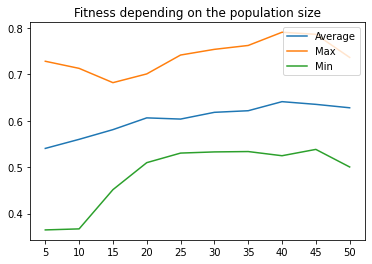

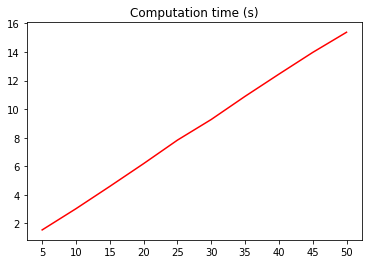

In [30]:
p_size = 5 # start with size 0
rex_score_list = []

### lists for plotting

popsize = []
average = []
highest = []
lowest = []
times = []


while p_size <= 50:
    
    i = 0
    rex_score_list = []  
    start = time.process_time() # start timer
    
    # do 50 iterations
    while i < 50:

        best_rex = de_algorithm(pop_size=p_size, generations=100, crossover_rate=0.9, differential_weight=0.8, cost_function=cost_function)
        rex_score = combi_fitness(best_rex)
        rex_score_list.append(rex_score)
        
        i += 1
    
    # append values for plotting
    popsize.append(p_size)
    average.append(statistics.mean(rex_score_list)) 
    highest.append(max(rex_score_list))
    lowest.append(min(rex_score_list))
    times.append(time.process_time() - start)
    
    # print info
    print('Current Population size: ' + str(p_size))
    print('Time (50 iterations): ' + str(time.process_time() - start))

    print('Average fitness: ' + str(statistics.mean(rex_score_list)))
    print('Highest fitness: ' + str(max(rex_score_list)))
    print('Lowest fitness: ' + str(min(rex_score_list))+ "\n")
    
    # increase population size
    p_size += 5
    
# plot results
plt.plot(popsize, average, label = "Average")
plt.plot(popsize, highest, label = "Max")
plt.plot(popsize, lowest, label = "Min")

plt.legend(loc='upper right')
plt.title("Fitness depending on the population size")
plt.xticks(popsize)
plt.show()

# plot results
plt.plot(popsize, times,color="red")
plt.title("Computation time (s)")
plt.xticks(popsize)
plt.show()

##### Epoch size (0-50)

Current Epoch size: 5
Time (50 iterations): 2.102216999999996
Average fitness: 0.6611827344418469
Highest fitness: 0.7472971750296615
Lowest fitness: 0.5850905265475673

Current Epoch size: 10
Time (50 iterations): 3.241228000000035
Average fitness: 0.6608724717249141
Highest fitness: 0.7495931806976922
Lowest fitness: 0.5487823644318931

Current Epoch size: 15
Time (50 iterations): 5.044511
Average fitness: 0.6611621601718516
Highest fitness: 0.7522289378788677
Lowest fitness: 0.5899396197634005

Current Epoch size: 20
Time (50 iterations): 6.710733999999945
Average fitness: 0.6595905673727659
Highest fitness: 0.7840833617983134
Lowest fitness: 0.5606687841545904

Current Epoch size: 25
Time (50 iterations): 8.52518299999997
Average fitness: 0.6621210428359204
Highest fitness: 0.7944748007482069
Lowest fitness: 0.5867742305159499

Current Epoch size: 30
Time (50 iterations): 9.889914999999974
Average fitness: 0.6651398787553178
Highest fitness: 0.7688806903751558
Lowest fitness: 0.584

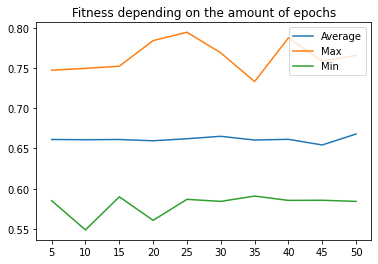

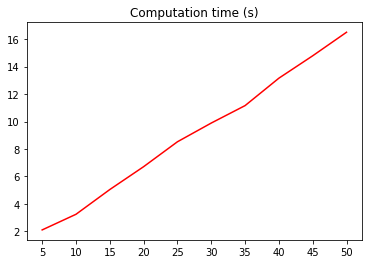

In [31]:
epoch_size = 5 # start with size 0
rex_score_list = []

### lists for plotting

epochsize = []
average = []
highest = []
lowest = []
times = []


while epoch_size <= 50:
    
    i = 0
    rex_score_list = []  
    start = time.process_time() # start timer
    
    # do 50 iterations
    while i < 50:

        best_rex = de_algorithm(pop_size=100, generations=epoch_size, crossover_rate=0.9, differential_weight=0.8, cost_function=cost_function)
        rex_score = combi_fitness(best_rex)
        rex_score_list.append(rex_score)
        
        i += 1
    
    # append values for plotting
    epochsize.append(epoch_size)
    average.append(statistics.mean(rex_score_list)) 
    highest.append(max(rex_score_list))
    lowest.append(min(rex_score_list))
    times.append(time.process_time() - start)
    
    # print info
    print('Current Epoch size: ' + str(epoch_size))
    print('Time (50 iterations): ' + str(time.process_time() - start))

    print('Average fitness: ' + str(statistics.mean(rex_score_list)))
    print('Highest fitness: ' + str(max(rex_score_list)))
    print('Lowest fitness: ' + str(min(rex_score_list))+ "\n")
    
    # increase epoch size
    epoch_size += 5
    
# plot results
plt.plot(epochsize, average, label = "Average")
plt.plot(epochsize, highest, label = "Max")
plt.plot(epochsize, lowest, label = "Min")

plt.legend(loc='upper right')
plt.title("Fitness depending on the amount of epochs")
plt.xticks(epochsize)
plt.show()

# plot results
plt.plot(epochsize, times,color="red")
plt.title("Computation time (s)")
plt.xticks(epochsize)
plt.show()

##### Crossover rate (0.1-0.9)

In [32]:
cr_rate = 0.1 # start with size 0
rex_score_list = []

### lists for plotting

crrate = []
average = []
highest = []
lowest = []
times = []

while cr_rate <= 0.9:
    
    i = 0
    rex_score_list = []  
    start = time.process_time() # start timer
    
    # do 50 iterations
    while i < 50:

        best_rex = de_algorithm(pop_size=100, generations=100, crossover_rate=cr_rate, differential_weight=0.8, cost_function=cost_function)
        rex_score = combi_fitness(best_rex)
        rex_score_list.append(rex_score)
        
        i += 1
    
    # append values for plotting
    crrate.append(cr_rate)
    average.append(statistics.mean(rex_score_list)) 
    highest.append(max(rex_score_list))
    lowest.append(min(rex_score_list))
    times.append(time.process_time() - start)
    
    # print info
    print('Current Crossover rate: ' + str(cr_rate))
    print('Time (50 iterations): ' + str(time.process_time() - start))

    print('Average fitness: ' + str(statistics.mean(rex_score_list)))
    print('Highest fitness: ' + str(max(rex_score_list)))
    print('Lowest fitness: ' + str(min(rex_score_list))+ "\n")
    
    # increase crossover rate
    cr_rate += 0.1
    
# plot results
plt.plot(crrate, average, label = "Average")
plt.plot(crrate, highest, label = "Max")
plt.plot(crrate, lowest, label = "Min")

plt.legend(loc='upper right')
plt.title("Fitness depending on the Crossover rate")
plt.xticks(crrate)
plt.show()

# plot results
plt.plot(crrate, times,color="red")
plt.title("Computation time (s)")
plt.xticks(crrate)
plt.show()

Current Crossover rate: 0.1
Time (50 iterations): 32.26039099999997
Average fitness: 0.7159477816321712
Highest fitness: 0.816960210044304
Lowest fitness: 0.6248072940629098

Current Crossover rate: 0.2
Time (50 iterations): 31.889904
Average fitness: 0.7106019865945296
Highest fitness: 0.7881258145594773
Lowest fitness: 0.6359030463361749

Current Crossover rate: 0.30000000000000004
Time (50 iterations): 31.50543300000004
Average fitness: 0.7027648859860618
Highest fitness: 0.7940839536449565
Lowest fitness: 0.6069768559606791

Current Crossover rate: 0.4
Time (50 iterations): 31.936388999999963
Average fitness: 0.6954456162668036
Highest fitness: 0.8284770714668817
Lowest fitness: 0.6029124129723872

Current Crossover rate: 0.5
Time (50 iterations): 32.55775399999999
Average fitness: 0.6919653113160914
Highest fitness: 0.7886768237362075
Lowest fitness: 0.5928628718085012

Current Crossover rate: 0.6
Time (50 iterations): 32.32368500000007
Average fitness: 0.6794277646532876
Highest 

##### Differential weight(0.1-0.9)

Current Differential Weight: 0.1
Time (50 iterations): 86.9375
Average fitness: 0.5133596420388243
Highest fitness: 0.7383927871100208
Lowest fitness: 0.2774435204427063

Current Differential Weight: 0.2
Time (50 iterations): 87.59375
Average fitness: 0.5089042449785451
Highest fitness: 0.7028096922169276
Lowest fitness: 0.2526396576805882

Current Differential Weight: 0.30000000000000004
Time (50 iterations): 85.671875
Average fitness: 0.514511747957088
Highest fitness: 0.7674210342927893
Lowest fitness: 0.3274936566488058

Current Differential Weight: 0.4
Time (50 iterations): 97.703125
Average fitness: 0.5051097328789398
Highest fitness: 0.6990425859557835
Lowest fitness: 0.32827849050199737

Current Differential Weight: 0.5
Time (50 iterations): 100.734375
Average fitness: 0.5268152752729581
Highest fitness: 0.7415128474054032
Lowest fitness: 0.3215255971179831

Current Differential Weight: 0.6
Time (50 iterations): 91.140625
Average fitness: 0.5286175726561377
Highest fitness: 0.7

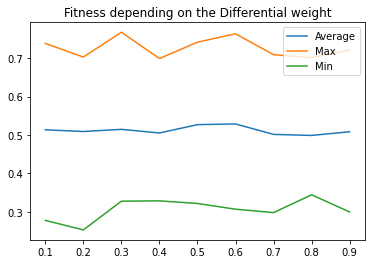

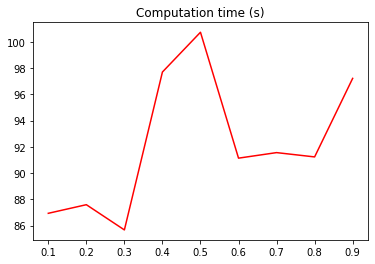

In [ ]:
dw_rate = 0.1 # start with size 0
rex_score_list = []

### lists for plotting

dwrate = []
average = []
highest = []
lowest = []
times = []

while dw_rate <= 0.9:
    
    i = 0
    rex_score_list = []  
    start = time.process_time() # start timer
    
    # do 50 iterations
    while i < 50:

        best_rex = de_algorithm(pop_size=100, generations=100, crossover_rate=0.9, differential_weight=dw_rate, cost_function=cost_function)
        rex_score = combi_fitness(best_rex)
        rex_score_list.append(rex_score)
        
        i += 1
    
    # append values for plotting
    dwrate.append(dw_rate)
    average.append(statistics.mean(rex_score_list)) 
    highest.append(max(rex_score_list))
    lowest.append(min(rex_score_list))
    times.append(time.process_time() - start)
    
    # print info
    print('Current Differential Weight: ' + str(dw_rate))
    print('Time (50 iterations): ' + str(time.process_time() - start))

    print('Average fitness: ' + str(statistics.mean(rex_score_list)))
    print('Highest fitness: ' + str(max(rex_score_list)))
    print('Lowest fitness: ' + str(min(rex_score_list))+ "\n")
    
    # increase Differential weight
    dw_rate += 0.1
    
# plot results
plt.plot(dwrate, average, label = "Average")
plt.plot(dwrate, highest, label = "Max")
plt.plot(dwrate, lowest, label = "Min")

plt.legend(loc='upper right')
plt.title("Fitness depending on the Differential weight")
plt.xticks(dwrate)
plt.show()

# plot results
plt.plot(dwrate, times,color="red")
plt.title("Computation time (s)")
plt.xticks(dwrate)
plt.show()

## Task 6: Write Up!

Whew! That was a lot of work! Well, for the algorithm anyway. A representative from a company you've forgotten the name of right now (was it EnGin? InTen? Oh, nevermind) has reached out to you and asked for a report on your observations from your experiment, for reasons they'd rather not disclose apparently. They seem particularly interested in how changing various parameters might affect the process. Go ahead and play around with your algorithm a bit (perhaps you'd like to try out different population sizes, crossover rate and differential weight values, or even tweak your fitness functions?) to generate an answer for them. Turns out your lab has an email template you can use, so all you'll need to do is plug in your observations and hope they're not used for anything...potentially problematic.

(Hint - Your lab recently genetically engineered species #5698, which your team is currently calling "Bonus Point." A few of those might have escaped, but if you come up with a sufficiently interesting name for yourself in the report, they might just decide to come back and help you out.)

From: BestResearcherEver (bre@uni-osnabrueck.de)
To: NotAMadScientist (research@ingen.jp)

Dear InGen Research Team,

Pursuant to your request for further data on the effect of parameter manipulation in our Differential Evolution experiment with species #1475, Tyrannosaurus rex, the following is a brief report on my observations:

**Your Answer Here**

Sincerely,
BestResearcherEver

## Just For Fun - Dino Dating

So you think you can design the best dinosaur, eh? Well, you've created a pretty hearty T-Rex there, but it won't get very far in the evolution game if no one wants to take it out to the dance. Let's see how your top predator survives its next big challenge, Germany's latest top hit prehistoric TV show - DinoDating!

This section is just for fun. You don't actually have to code anything, just plug in your best Rex and see how it fares.

Normally the judges don't like to share their scoring criteria, but since this is an academic exercise, they bent the rules this once.

(75 - 100) - Ooh La La!
(50 - 74) - Dateable
(25 - 49) - In The Right Clothes, Maybe...
(0 - 24) - Well, no takers now, but take some time to become your best self and try again later. :)

In [ ]:
from dino_dating import dating_fitness

score = dating_fitness(best_rex)

print('Your top Rex scored ' + str(score) + ' in Dino Dating!')

Your top Rex scored 17.484683282324763 in Dino Dating!


## How Did You Do?

This part is optional, but gives you a chance to see how well your algorithm functions. Your algorithm should output a Rex with a vector close to [100, 30, 8, 5, 42, 7, 0] and a score close to 100.

In [ ]:
from dino_dating import dating_fitness

dating_cost_function = lambda x:-dating_fitness(x)

best_dater = de_algorithm(pop_size=100,generations=50,crossover_rate=0.8,differential_weight=0.5,cost_function=dating_cost_function)

dater_score = dating_fitness(best_dater)

print('Your algorithm output ' + str(best_dater) + 'as the best individual, with a dating score of ' + str(dater_score) + ' . How did you do? :)')

Your algorithm output [861.6509226383558, 23.47351447728677, 0.40335956115604055, 5557.764748350053, 0.3772861652118231, 7.234087022001276, 0.5835879230188297]as the best individual, with a dating score of 24.77926891870526 . How did you do? :)
